In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


## Customers Segmentation based on their Credit Card usage behaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**

* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

In [3]:
df= pd.read_csv("CC GENERAL.csv")
data=df
print(df.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data Preprocessing

Descriptive Statistics of Data

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Customer ID is unnecessary for building a clustering model (or any prediction model).
# Dropping customer Id column.
data.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
# Checking for null values
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# The easiest way to handle the columns with null values is either to drop those rows, or fill with mean value.
# Filling with mean value
data = data.fillna(data.mean())

# Verifying all the columns are filled
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# K-mean clustering model uses "distances" between data points to put them into groups
# Logically, for it to work well, we will need to standardize the unit of the "distances"
# Therefore, we would like to scale the dataset. Here, again, we would use the one of the most commonly used method - StandardScaler.
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [9]:
#PART 3

In [10]:
from sklearn.cluster import KMeans

# Let's start with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Evaluating the model with different metrics
# Decreasing the WCSS is the key objective
# Silhouette coefficient should be nearer to +1
# Lower the value of Davies-Bouldin Index would improve the performance.

from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

labels = kmeans.fit_predict(data)

print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(data, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(data, labels))

Silhouette Coefficient: 0.398
Calinski-Harabasz Index: 2685.157
Davies-Bouldin Index: 1.403


In [12]:
#PART 4

In [ ]:
# Elbow Method with WCSS (Within-Cluster Sum of Square).

# To do that, we would need to build multiple models with varying "number of clusters (i.e. K)"
# We can extract the wcss value from the model by using the inertia_ field
# We would then put value of WCSS in each of model into an array and visualize them later

wcss = []

for i in range(2, 16): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)
    

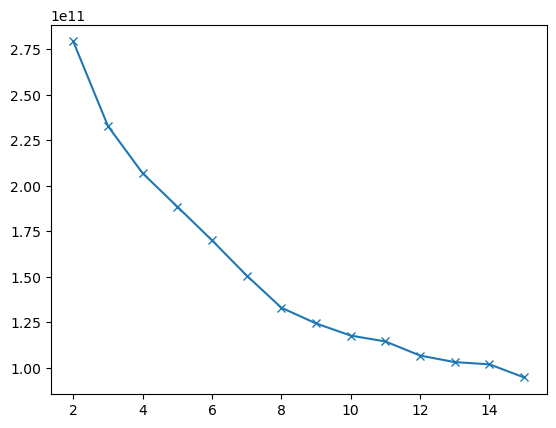

In [14]:
# After having the series of WCSS values, we can then plot it out, and see what is the optimal K value.

import matplotlib.pyplot as plt

kvalue = range(2, 16)
plt.plot(kvalue, wcss, marker='x')
plt.show()

In [15]:
# Let's try to plot other metrics in the same chart as well

silhouette = []
davies_bouldin = []

for i in range(2, 16): 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    labels = kmeans.fit_predict(data)
    silhouette.append(silhouette_score(data, labels))
    davies_bouldin.append(davies_bouldin_score(data, labels))

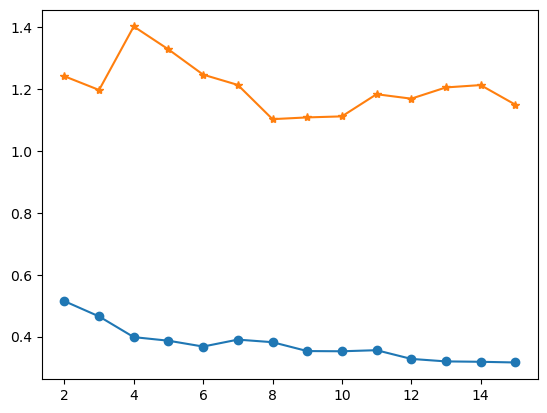

In [16]:
kvalue = range(2, 16)
plt.plot(kvalue, silhouette, marker='o')
plt.plot(kvalue, davies_bouldin, marker='*')
plt.show()

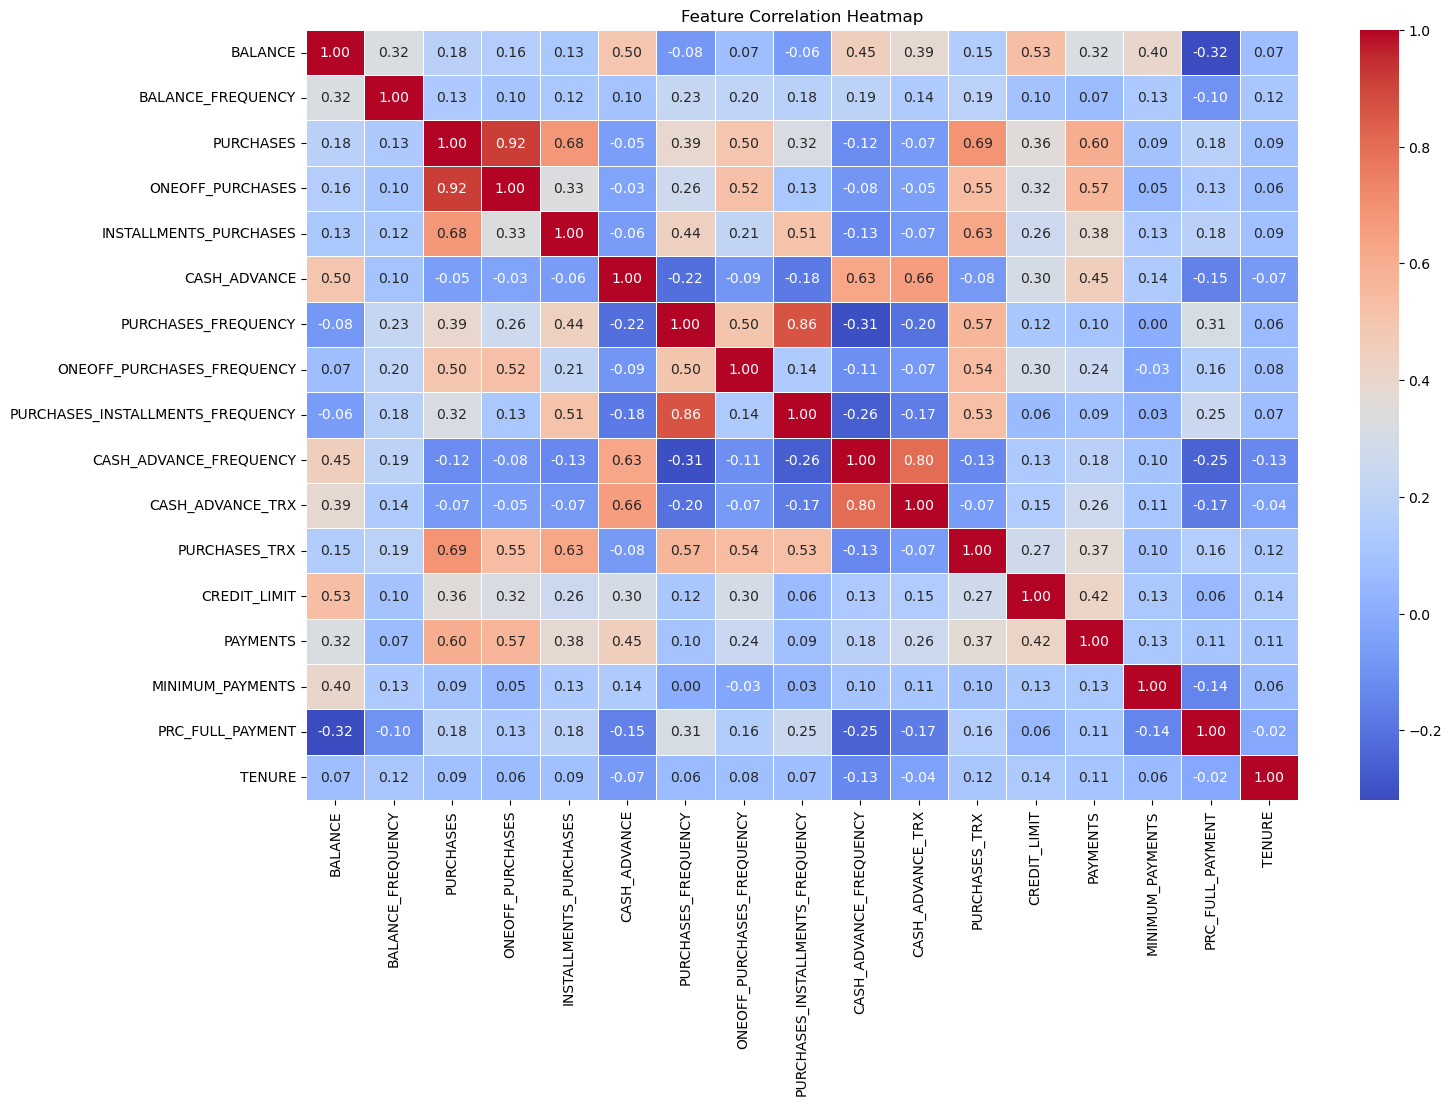

In [17]:
# Remove non-numeric columns if any (e.g., 'CUST_ID')
df_numeric = df.select_dtypes(include='number')

# Calculate correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
